# Capstone Project - ReviewCheck - Deceptive Review Analyser

- Tejas Vyas
- Pooja Vasan
- Riddhi Thakkar
- Manu Sihag

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [4]:
#Amazon Data
input_file = "amazon_reviews.txt"
amazon = pd.read_csv(input_file,delimiter='\t')
amazon['source']='amazon'

#combine all data sets
data = pd.DataFrame()
data = pd.concat([amazon])
print(data.head(5))
print(data.tail(5))

   DOC_ID       LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  PRODUCT_ID  \
0       1  __label1__       4                 N               PC  B00008NG7N   
1       2  __label1__       4                 Y         Wireless  B00LH0Y3NM   
2       3  __label1__       3                 N             Baby  B000I5UZ1Q   
3       4  __label1__       4                 N  Office Products  B003822IRA   
4       5  __label1__       4                 N           Beauty  B00PWSAXAM   

                                       PRODUCT_TITLE  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   
3  Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitenin...   

               REVIEW_TITLE  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week

## Data Cleanup and tokenization

In [5]:
import string
def remove_punct(text):
  text_nopunct= "".join ([char for char in text if char not in string.punctuation])
  return text_nopunct
data['body_text_clean']=data['REVIEW_TEXT'].apply(lambda x:remove_punct(x))
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,source,body_text_clean
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",amazon,When least you think so this product will save...
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,amazon,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,amazon,I purchased this swing for my baby She is 6 mo...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,amazon,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,amazon,I only use it twice a week and the results are...


In [6]:
import re
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens
data['body_text_tokenized']=data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,source,body_text_clean,body_text_tokenized
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",amazon,When least you think so this product will save...,"[when, least, you, think, so, this, product, w..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,amazon,Lithium batteries are something new introduced...,"[lithium, batteries, are, something, new, intr..."
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,amazon,I purchased this swing for my baby She is 6 mo...,"[i, purchased, this, swing, for, my, baby, she..."
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,amazon,I was looking for an inexpensive desk calcolat...,"[i, was, looking, for, an, inexpensive, desk, ..."
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,amazon,I only use it twice a week and the results are...,"[i, only, use, it, twice, a, week, and, the, r..."


In [7]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopword]
  return text

data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,source,body_text_clean,body_text_tokenized,body_text_nostop
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",amazon,When least you think so this product will save...,"[when, least, you, think, so, this, product, w...","[least, think, product, save, day, keep, aroun..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,amazon,Lithium batteries are something new introduced...,"[lithium, batteries, are, something, new, intr...","[lithium, batteries, something, new, introduce..."
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,amazon,I purchased this swing for my baby She is 6 mo...,"[i, purchased, this, swing, for, my, baby, she...","[purchased, swing, baby, 6, months, pretty, mu..."
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,amazon,I was looking for an inexpensive desk calcolat...,"[i, was, looking, for, an, inexpensive, desk, ...","[looking, inexpensive, desk, calcolatur, works..."
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,amazon,I only use it twice a week and the results are...,"[i, only, use, it, twice, a, week, and, the, r...","[use, twice, week, results, great, used, teeth..."


In [8]:
nltk.download('wordnet')

def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [10]:
print(len(data[data["LABEL"] == "1"].dropna()))
print(len(data[data["LABEL"] == "0"].dropna()))

10500
10500


In [11]:
print(data[data["LABEL"] == "1"].head())

   DOC_ID LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  PRODUCT_ID  \
0       1     1       4                 N               PC  B00008NG7N   
1       2     1       4                 Y         Wireless  B00LH0Y3NM   
2       3     1       3                 N             Baby  B000I5UZ1Q   
3       4     1       4                 N  Office Products  B003822IRA   
4       5     1       4                 N           Beauty  B00PWSAXAM   

                                       PRODUCT_TITLE  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   
3  Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitenin...   

               REVIEW_TITLE  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week   

                               

# Setup train and test splits

### Creating cleaned sentence list to use in vectorizers

In [12]:
clean_sentences = []
for l in data['body_text_nostop'].values:
    clean_sentences.append(' '.join(l))
#print(clean_sentences)
y = data['LABEL']

### Vectorization

In [13]:
from sklearn import linear_model, model_selection

sentences_train, sentences_test, y_train, y_test = model_selection.train_test_split(clean_sentences, y, test_size=0.25, random_state=42)
#print(sentences_train)
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorizer.fit(sentences_train)
X = vectorizer.transform(clean_sentences)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transform=TfidfTransformer()
X_tfidf = tfidf_transform.fit_transform(X)
X_train_tfidf=tfidf_transform.fit_transform(X_train)
X_test_tfidf=tfidf_transform.fit_transform(X_test)

# Algorithm approaches

- Logistic Regression
- Deep Learning - LSTM

### Training

In [14]:
#Logistic Regression
logRes = linear_model.LogisticRegression()
logRes.fit(X_train, y_train)
logResscore = logRes.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
logRes_tfidf = linear_model.LogisticRegression()
logRes_tfidf.fit(X_train_tfidf, y_train)
logRes_tfidf_score = logRes_tfidf.score(X_test_tfidf, y_test)

In [16]:
print("Logistic Regression Accuracy")
print("Count Vectorizer", format(logResscore,'.2%'))
print("TFIDF Vectorizer:", format(logRes_tfidf_score,'.2%'))

Logistic Regression Accuracy
Count Vectorizer 63.03%
TFIDF Vectorizer: 64.38%


In [17]:
!pip install tensorflow_datasets

In [18]:
#LSTM
#!pip install tensorflow_datasets
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import tensorflow_datasets as tfds
import numpy as np
max_length =100
trunc_type='post'
padding_type='post'
#pad all Sequence
vocab_size=1000

temp_sentences=data['REVIEW_TEXT'].tolist()
label=data['LABEL'].astype(int).tolist()

tokenizer_tfds=tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(temp_sentences,vocab_size,max_subword_length=5)
for i,sent in enumerate(temp_sentences):
    temp_sentences[i]=tokenizer_tfds.encode(sent)
sequence_added=pad_sequences(temp_sentences,maxlen=max_length,padding =padding_type,truncating=trunc_type)

training_size=int(len(temp_sentences)*0.75)
train_seq=sequence_added[:training_size]
train_labels=label[:training_size]

test_seq=sequence_added[training_size:]
test_labels=label[training_size:]

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

def createLSTM():
    embedding_dim=16
    model=Sequential([
        Embedding(1000,embedding_dim,input_length=100),
        Bidirectional(LSTM(embedding_dim,return_sequences=True)),
        Bidirectional(LSTM(embedding_dim)),        
        Dense(6,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    return model

In [19]:
lstm_classifier = createLSTM()
lstm_classifier.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
lstm_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 32)           4224      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
lstm_classifier.fit(train_seq,train_labels,epochs=20,validation_data=(test_seq,test_labels),callbacks=[earlyStop])
lstm_score = lstm_classifier.evaluate(test_seq,test_labels)[1]

Epoch 1/20
493/493 [==============================] - 30s 62ms/step - loss: 0.5767 - accuracy: 0.7108 - val_loss: 1.0633 - val_accuracy: 0.3010
Epoch 2/20
493/493 [==============================] - 27s 55ms/step - loss: 0.5228 - accuracy: 0.7507 - val_loss: 0.9834 - val_accuracy: 0.3994
Epoch 3/20
493/493 [==============================] - 28s 58ms/step - loss: 0.5056 - accuracy: 0.7607 - val_loss: 0.9158 - val_accuracy: 0.4503
Epoch 4/20
493/493 [==============================] - 28s 56ms/step - loss: 0.4884 - accuracy: 0.7705 - val_loss: 0.9497 - val_accuracy: 0.5042
Epoch 5/20
493/493 [==============================] - 25s 52ms/step - loss: 0.4738 - accuracy: 0.7799 - val_loss: 1.2657 - val_accuracy: 0.3918
Epoch 6/20
493/493 [==============================] - 27s 54ms/step - loss: 0.4611 - accuracy: 0.7856 - val_loss: 1.0006 - val_accuracy: 0.5156
Epoch 00006: early stopping
165/165 [==============================] - 2s 14ms/step - loss: 1.0006 - accuracy: 0.5156


In [21]:
print("Deep Learning LSTM Accuracy")
print("Subword Text Encoder Accuracy",format(lstm_score,'.2%'))
print("-----------")

Deep Learning LSTM Accuracy
Subword Text Encoder Accuracy 51.56%
-----------


# AI Algorithm Analysis and Hyperparam Optimization

## Confusion Matrices

Confusion Matrices -


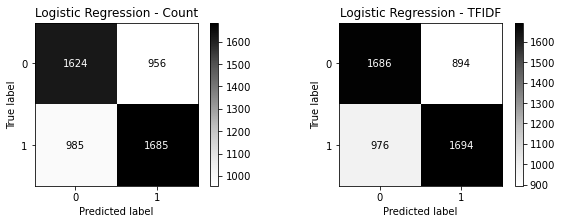

In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_confusion_matrix(logRes, X_test, y_test, cmap=plt.cm.Greys, ax=ax1)
plot_confusion_matrix(logRes_tfidf, X_test_tfidf, y_test, cmap=plt.cm.Greys, ax=ax2)
ax1.set_title("Logistic Regression - Count")
ax2.set_title("Logistic Regression - TFIDF")

print("Confusion Matrices -")

### Other scores via Classification Report

In [23]:
from sklearn.metrics import classification_report

lr_pred = logRes.predict(X_test)
lr_pred_tfidf = logRes_tfidf.predict(X_test_tfidf)


In [24]:
print("Logistic Regression")
print("Count Vectorizer")
print(classification_report(y_test, lr_pred))
print("--")
print("TFIDF Vectorizer")
print(classification_report(y_test, lr_pred_tfidf))
print("---------------------")

Logistic Regression
Count Vectorizer
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      2580
           1       0.64      0.63      0.63      2670

    accuracy                           0.63      5250
   macro avg       0.63      0.63      0.63      5250
weighted avg       0.63      0.63      0.63      5250

--
TFIDF Vectorizer
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2580
           1       0.65      0.63      0.64      2670

    accuracy                           0.64      5250
   macro avg       0.64      0.64      0.64      5250
weighted avg       0.64      0.64      0.64      5250

---------------------


In [25]:
# print(classification_report(test_labels, lstm_classifier.predict(test_seq)))
lstm_classifier.evaluate(test_seq,test_labels)

165/165 [==============================] - 2s 13ms/step - loss: 1.0006 - accuracy: 0.5156


[1.0005848407745361, 0.5156190395355225]